In [1]:
import cv2 as cv
import numpy as np

font = cv.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (255, 255, 255)
thickness = 2

In [2]:
def compute_lines(line: np.array):
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 480*(-b))
    y1 = int(y0 + 600*(a))
    x2 = int(x0 - 480*(-b))
    y2 = int(y0 - 600*(a))
    return x1, y1, x2, y2

In [3]:
def calibrate_threshold(cap: cv.VideoCapture) -> int:
    calibrating = True
    threshold = 127
    
    while calibrating:
        ret, frame = cap.read()
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        imgray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        _, thresh = cv.threshold(imgray, threshold, 100, cv.THRESH_BINARY)

        pressed_key = cv.waitKey(1)
        if pressed_key == ord('a'):
            threshold = min(255, threshold + 10)
        elif pressed_key == ord('s'):
            print('hey')
            threshold = max(0, threshold - 10)
        elif pressed_key == ord(' '):
            calibrating = False

        thresh = cv.putText(
            thresh, str(threshold), org, font, 
                   fontScale, (255, 255, 255), thickness, cv.LINE_AA)
        # print(threshold)
        cv.imshow('frame', thresh)

    return threshold

In [82]:
def calibrate_camera(cap: cv.VideoCapture, threshold: int) -> np.array:
    calibrating = True

    width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)

    cl_x1 = int(width/2)
    cl_y1 = 0
    cl_x2 = int(width/2)
    cl_y2 = int(height)
    central_line = np.array([cl_x1, cl_y1, cl_x2, cl_y2])

    
    while calibrating:
        ret, frame = cap.read()
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        imgray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        ret, thresh = cv.threshold(imgray, threshold, 100, cv.THRESH_BINARY)
        edges = cv.Canny(thresh,50,150)
        # edges = cv.blur(edges, (3, 3))

        lines = cv.HoughLines(edges, 1, 2 * np.pi/180, 250)

        right_line = None
        right_line_lenght = 0
        left_line = None
        left_line_lenght = 0
        try:
            for line in lines:                
                x1,y1,x2,y2 = compute_lines(line[0])
                cv.line(frame,(x1, y1),(x2, y2),(0,0, 255),2)
                
            #     x1_diff = cl_x1 - x1
            #     y1_diff = cl_y1 - y1
            #     x2_diff = cl_x2 - x2
            #     y2_diff = cl_y2 - y2
            #     line_lenght = (x2 - x1) ** 2 + (y2 - y1) ** 2
            #     if x1_diff > 0 and x2_diff > 0:
            #         if line_lenght > right_line_lenght:
            #             right_line = line[0]
            #     elif x1_diff < 0 and x2_diff < 0:
            #         if line_lenght > left_line_lenght:
            #             left_line = line[0]
                        
            # cv.line(frame,(left_line[0],left_line[1]),(left_line[2],left_line[3]),(0,0, 255),2)
            # cv.line(frame,(right_line[0],right_line[1]),(right_line[2],right_line[3]),(0,255,0),2)
            # cv.line(frame,(cl_x1, cl_y1), (cl_x2, cl_y2),(255,255,255),2)
        except TypeError as e:
            print('Nao foi possivel identificar linhas: ')
            
        # dest = cv.cornerHarris(thresh, 2, 5, 0.03)
        # dest = cv.dilate(dest, None) 
        # frame[dest > 0.01 * dest.max()]=[0, 0, 255]

        cv.imshow('frame', edges)

        if cv.waitKey(1) == ord(' '):
            break

    # return lines

In [83]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

main_loop = True

# threshold = calibrate_threshold(cap)
threshold = 177
calibrated_lines = calibrate_camera(cap, threshold)

# while main_loop:
#     ret, frame = cap.read()

#     imgray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#     ret, thresh = cv.threshold(imgray, threshold, 255, cv.THRESH_BINARY)
#     edges = cv.Canny(thresh,50,150)
#     lines = cv.HoughLines(edges,2, 2 * np.pi/180,150)

#     try:
#         for line in lines:
#             x1, y1, x2, y2 = compute_lines(line)
#             cv.line(frame,(x1,y1),(x2,y2),(0,0,255),2)

#         for line in calibrated_lines:
#             x1, y1, x2, y2 = compute_lines(line)
#             cv.line(frame,(x1,y1),(x2,y2),(0,255,0),2)

#     except TypeError as e:
#         print('Nao foi possivel identificar linhas')
    
#     cv.imshow('frame', frame)

#     if cv.waitKey(1) == ord('q'):
#         main_loop = False
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi possivel identificar linhas: 
Nao foi poss

In [6]:
ret, frame = cap.read()
edges = cv.Canny(frame, 200,150)

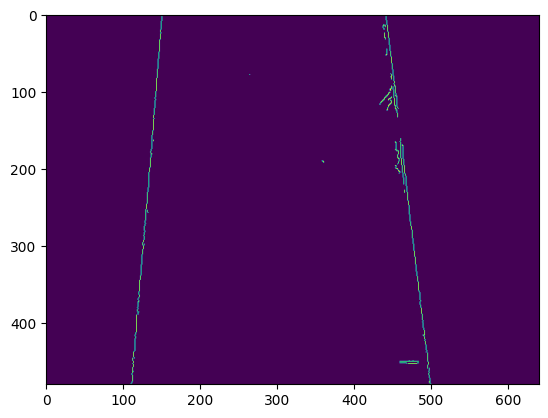

In [ ]:
plt.imshow(edges)

In [ ]:
lines = cv.HoughLines(edges,2, np.pi/180,260)

try:
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(frame,(x1,y1),(x2,y2),(0,0,255),2)

except TypeError as e:
    print('Nao foi possivel identificar linhas')

In [ ]:
imgray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
cv.drawContours(frame, contours, -1, (0,255,0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

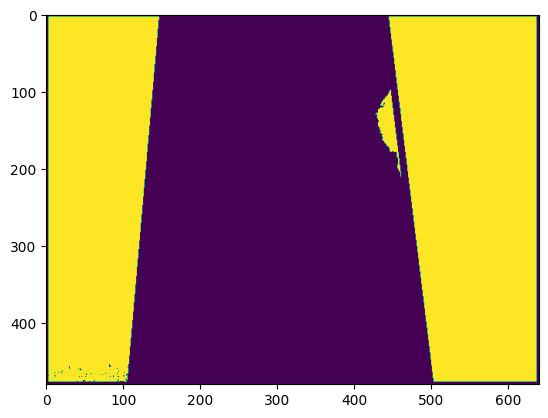

In [ ]:
imgray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 180, 200, 0)
plt.imshow(thresh)

In [ ]:

    
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    edges = cv.Canny(frame,100,200)
    # Our operations on the frame come here
    # gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame

    lines = cv.HoughLines(edges,2, np.pi/180,260)

    try:
        for line in lines:
            rho,theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            cv.line(frame,(x1,y1),(x2,y2),(0,0,255),2)

    except TypeError as e:
        print('Nao foi possivel identificar linhas')

    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()